In [2]:
#Importing the colab drive library to get the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline


In [3]:
dataset = pd.read_csv("spam.csv", encoding='latin-1')


In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#removing unnamed columns
dataset = dataset.drop('Unnamed: 2', 1)
dataset = dataset.drop('Unnamed: 3', 1)
dataset = dataset.drop('Unnamed: 4', 1)

C:\Users\dell\AppData\Local\Temp\ipykernel_26368\1279663868.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop('Unnamed: 2', 1)
C:\Users\dell\AppData\Local\Temp\ipykernel_26368\1279663868.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop('Unnamed: 3', 1)
C:\Users\dell\AppData\Local\Temp\ipykernel_26368\1279663868.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop('Unnamed: 4', 1)


In [6]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset = dataset.rename(columns = {'v1':'label','v2':'message'})

In [8]:
dataset.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
dataset.head(4)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


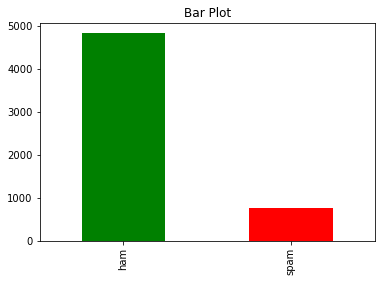

In [10]:
count_Class=pd.value_counts(dataset["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show();

In [11]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(dataset["message"])
np.shape(X)

(5572, 8404)

**Implementing Naive Bayes**

In [12]:
# Classifying spam and not spam msgs as 1 and 0

dataset["label"]=dataset["label"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, dataset['label'], test_size=0.70, random_state=42)

In [13]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [14]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)


,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998803,0.961805,0.913793,0.820998
1,0.11001,0.998803,0.966163,0.946360,0.826087
2,0.22001,0.999402,0.967444,0.938697,0.837607
3,0.33001,0.999402,0.968726,0.938697,0.844828
4,0.44001,0.999402,0.971546,0.929119,0.867621
5,0.55001,0.998803,0.976160,0.925287,0.899441
6,0.66001,0.998803,0.976160,0.919540,0.903955
7,0.77001,0.997606,0.977698,0.917625,0.915870
8,0.88001,0.997606,0.977954,0.909962,0.924125
9,0.99001,0.997606,0.978980,0.902299,0.938247


In [15]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             10.670010
Train Accuracy     0.977259
Test Accuracy      0.962574
Test Recall        0.720307
Test Precision     1.000000
Name: 97, dtype: float64

**Random Forest Method**

In [16]:
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [17]:
y_pred=rf_model.predict(X_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label=1, average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))

Precision : 0.99 / Recall : 0.743 / fscore : 0.849 / Accuracy: 0.965


In [21]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


**Using NLP techniques and using Tensorflow** 

In [24]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.models import Sequential
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
vocab_size = 400
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 16
encode = ({'ham': 0, 'spam': 1} )
#new dataset with replaced values
dataset = dataset.replace(encode)


In [26]:
X = dataset['message']
Y = dataset['label']
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
# convert to sequence of integers
X = tokenizer.texts_to_sequences(X)

In [27]:
X = np.array(X)
y = np.array(Y)

C:\Users\dell\AppData\Local\Temp\ipykernel_26368\42421382.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [28]:
X = pad_sequences(X, maxlen=max_length)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 16)           6400      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


In [30]:
num_epochs = 50
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=7)
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test,y_test), verbose=2)

Epoch 1/50
140/140 - 1s - loss: 0.5293 - accuracy: 0.8649 - val_loss: 0.3836 - val_accuracy: 0.8700 - 1s/epoch - 8ms/step
Epoch 2/50
140/140 - 0s - loss: 0.3823 - accuracy: 0.8649 - val_loss: 0.3673 - val_accuracy: 0.8700 - 246ms/epoch - 2ms/step
Epoch 3/50
140/140 - 0s - loss: 0.3706 - accuracy: 0.8649 - val_loss: 0.3553 - val_accuracy: 0.8700 - 293ms/epoch - 2ms/step
Epoch 4/50
140/140 - 0s - loss: 0.3561 - accuracy: 0.8649 - val_loss: 0.3385 - val_accuracy: 0.8700 - 272ms/epoch - 2ms/step
Epoch 5/50
140/140 - 0s - loss: 0.3344 - accuracy: 0.8649 - val_loss: 0.3118 - val_accuracy: 0.8700 - 230ms/epoch - 2ms/step
Epoch 6/50
140/140 - 0s - loss: 0.2996 - accuracy: 0.8649 - val_loss: 0.2688 - val_accuracy: 0.8700 - 256ms/epoch - 2ms/step
Epoch 7/50
140/140 - 0s - loss: 0.2426 - accuracy: 0.8768 - val_loss: 0.2024 - val_accuracy: 0.9040 - 295ms/epoch - 2ms/step
Epoch 8/50
140/140 - 0s - loss: 0.1824 - accuracy: 0.9331 - val_loss: 0.1526 - val_accuracy: 0.9498 - 245ms/epoch - 2ms/step
Epo

In [31]:
results = model.evaluate(X_test, y_test)
loss = results[0]
accuracy = results[1]


print(f"[+] Accuracy: {accuracy*100:.2f}%")

35/35 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9901
[+] Accuracy: 99.01%


**Doing the Predictions from the Model**

In [32]:
from keras.preprocessing import sequence

In [37]:
#Defining the function
def get_predictions(txts):
    txts = tokenizer.texts_to_sequences(txts)
    txts = pad_sequences(txts, maxlen=max_length)
    preds = model.predict(txts)
    if(preds[0] > 0.5):
        print("SPAM MESSAGE")
        
    else:
        print('NOT SPAM')

In [38]:
txts=["You have won a free ticket to las vegas. Contact now"]

get_predictions(txts)

1/1 [==============================] - 0s 88ms/step
SPAM MESSAGE


In [39]:
txts=["Hey there call me asap!!"]

get_predictions(txts)

1/1 [==============================] - 0s 22ms/step
NOT SPAM
